In [318]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s

## Plotting   Distribution of predicted probabilities for virus group withheld from training

In [379]:
probsfile = '../results/euk_all.csv'
df = pd.read_csv(probsfile)
df.rename(columns = {'label tax':'tax'}, inplace=True)
con = lambda row :f'{row["Dataset"]}_{row["Baltimore"]}_{row["N in class"]}' 
df['Dataset'] = df.apply ( con, axis =1)
df.head()

Unnamed: 0             Dataset  N in class Features  k    AUC Baltimore  \
0           0  Aedes_genus_RNA_67          67       AA  1  0.769       RNA   
1           1  Aedes_genus_RNA_67          67       AA  2  0.639       RNA   
2           2  Aedes_genus_RNA_67          67       AA  3  0.815       RNA   
3           3  Aedes_genus_RNA_67          67       AA  4  0.769       RNA   
4           4  Aedes_genus_RNA_67          67      DNA  1  0.490       RNA   

  Feature set    tax  label  
0        AA_1  genus  Aedes  
1        AA_2  genus  Aedes  
2        AA_3  genus  Aedes  
3        AA_4  genus  Aedes  
4       DNA_1  genus  Aedes

In [380]:
set(df['Baltimore'])

{'(+)ssRNA', '(-)ssRNA', 'RNA', 'Retro', 'all', 'dsDNA', 'dsRNA', 'ssDNA'}

In [381]:
tax_order =['kingdom','phylum','class','order','family','genus','species']
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']
balt_order = ['all','RNA','(+)ssRNA', '(-)ssRNA','dsRNA','dsDNA', 'ssDNA']

df['tax'] = df['tax'].astype('category')
df['tax'].cat.set_categories(tax_order, inplace=True)
df['Feature set'] = df['Feature set'].astype('category')
df['Feature set'].cat.set_categories(fs_order, inplace=True)
df['Baltimore'] = df['Baltimore'].astype('category')
df['Baltimore'].cat.set_categories(balt_order, inplace=True)
#results['Dataset'] = results['Dataset'].astype('category')
#results['Dataset'].cat.set_categories(tax_order, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
Unnamed: 0     2400 non-null int64
Dataset        2400 non-null object
N in class     2400 non-null int64
Features       2400 non-null object
k              2400 non-null object
AUC            2400 non-null float64
Baltimore      2320 non-null category
Feature set    2400 non-null category
tax            2400 non-null category
label          2400 non-null object
dtypes: category(3), float64(1), int64(2), object(4)
memory usage: 139.9+ KB


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
Unnamed: 0     2400 non-null int64
Dataset        2400 non-null object
N in class     2400 non-null int64
Features       2400 non-null object
k              2400 non-null object
AUC            2400 non-null float64
Baltimore      2320 non-null category
Feature set    2400 non-null category
tax            2400 non-null category
label          2400 non-null object
dtypes: category(3), float64(1), int64(2), object(4)
memory usage: 139.9+ KB


kingdom 15
phylum 18
class 20
order 30
family 14
genus 11
species 7


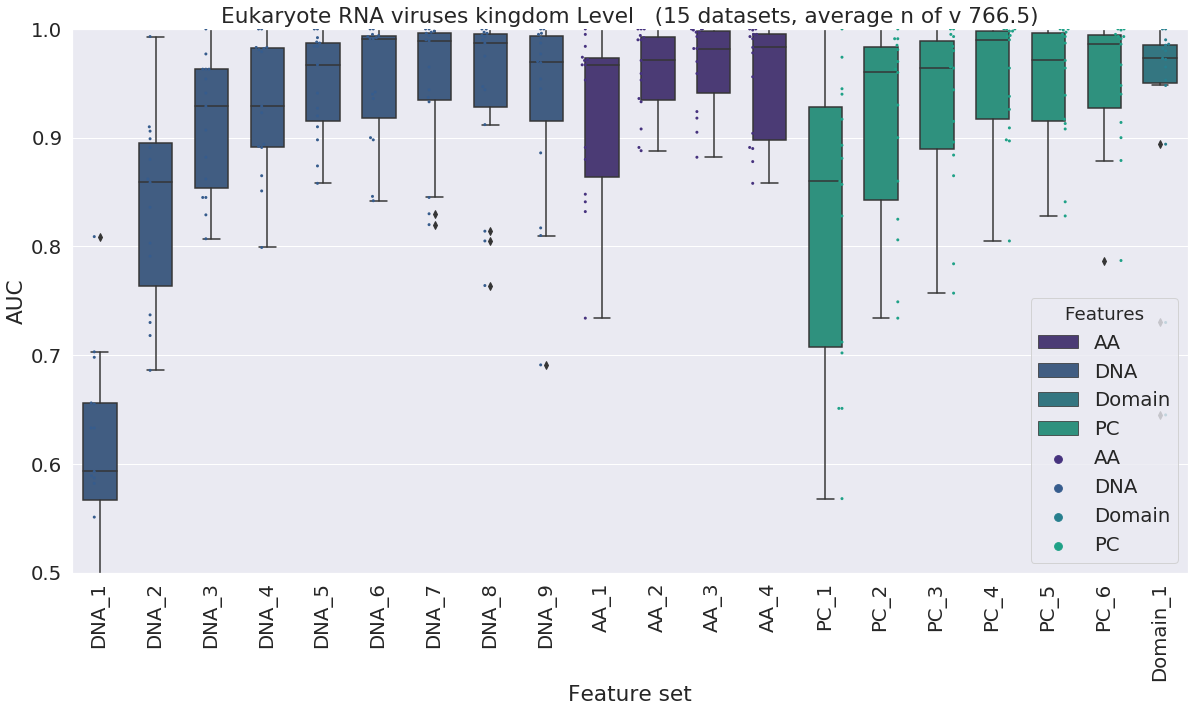

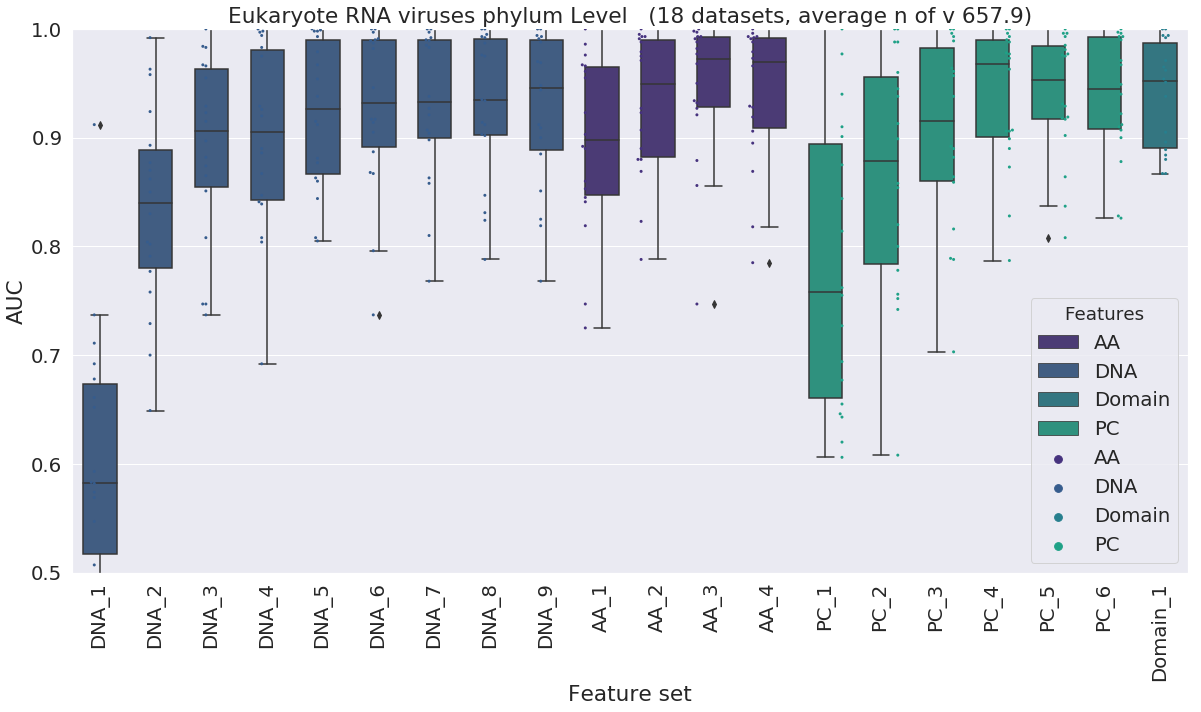

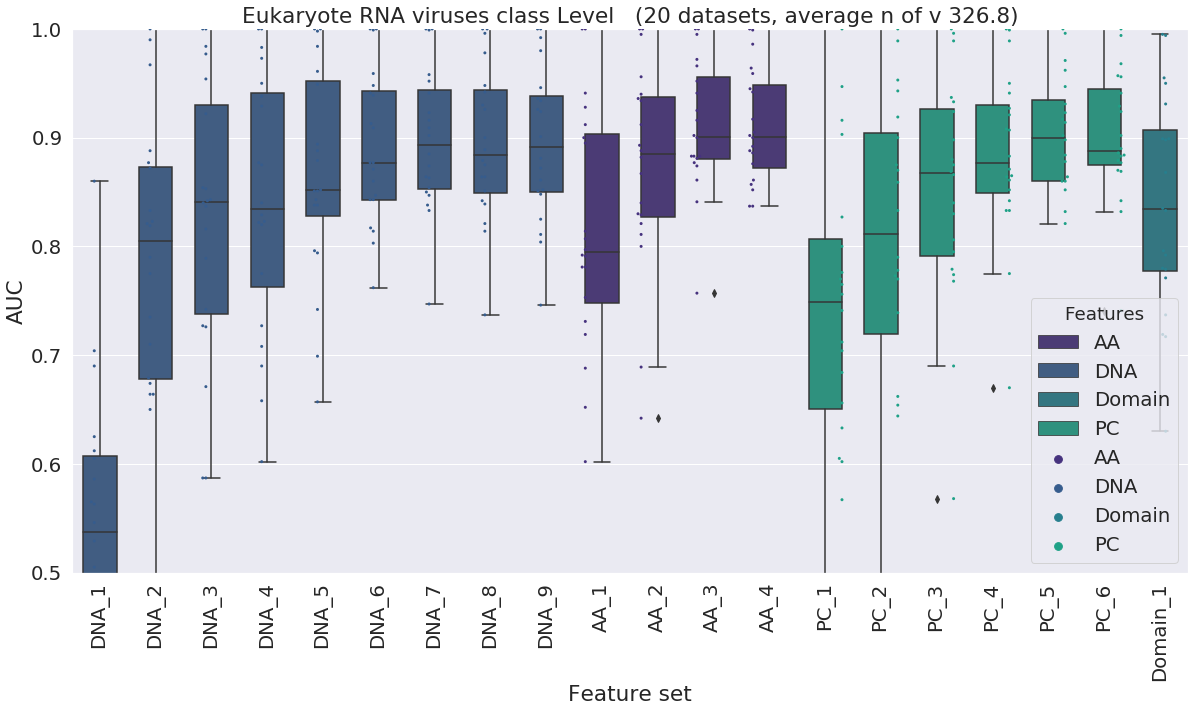

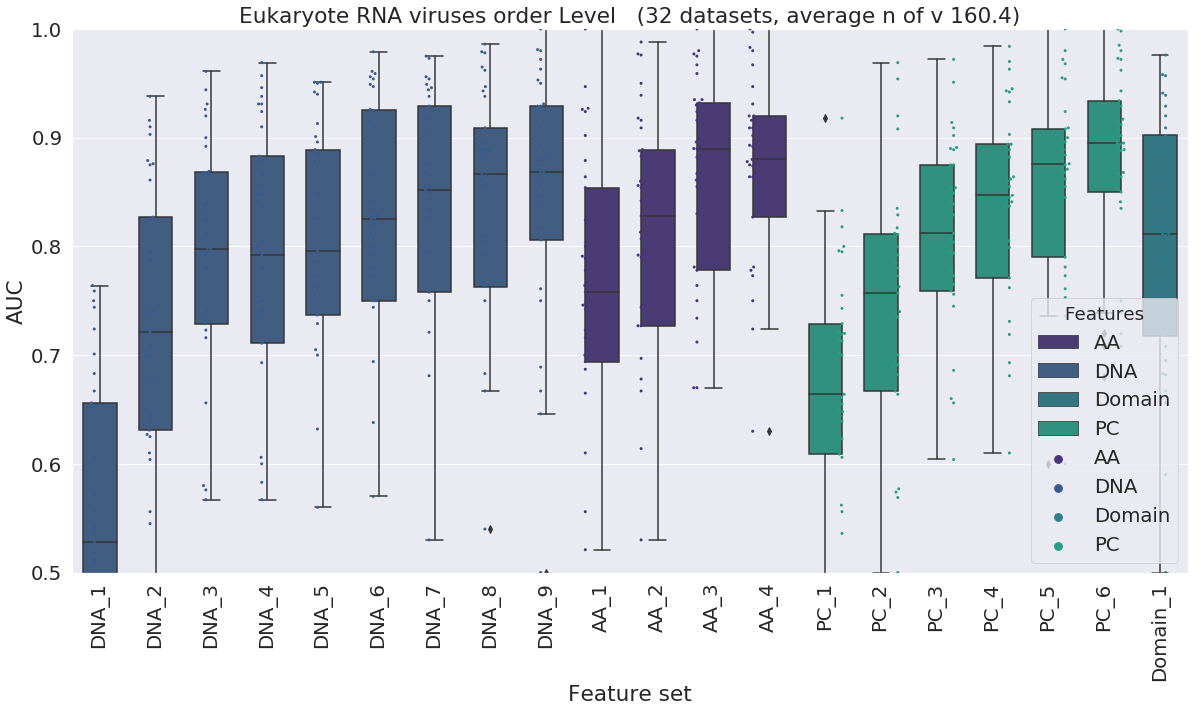

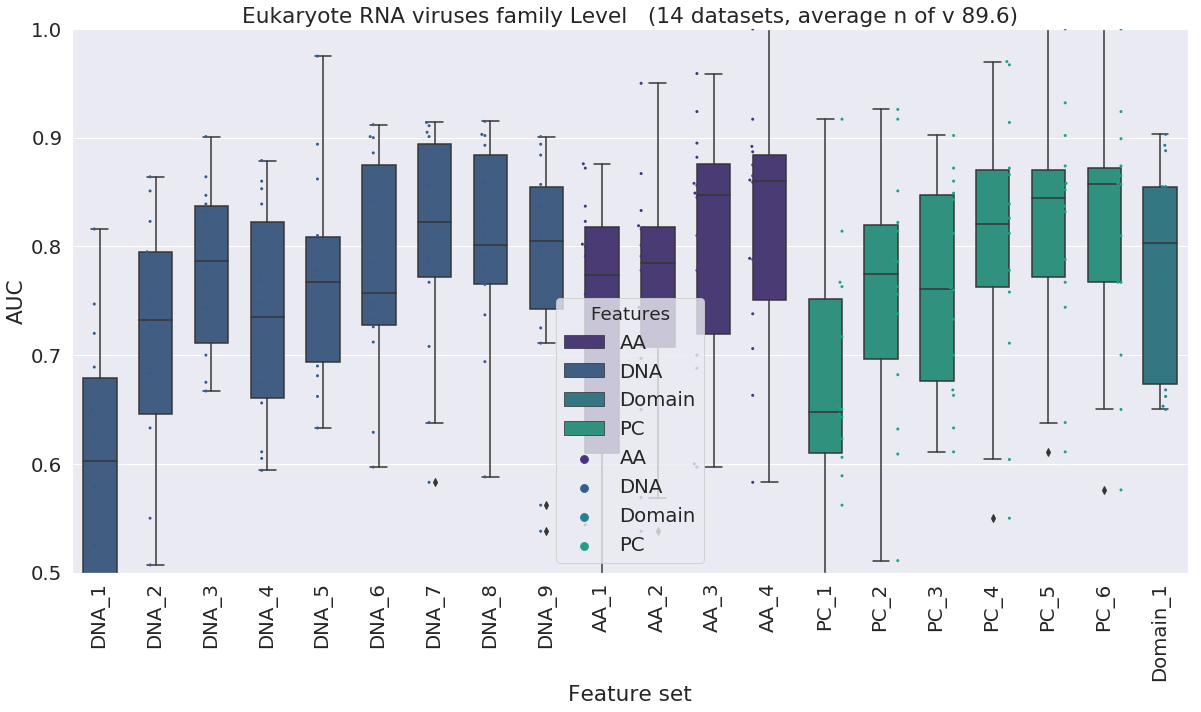

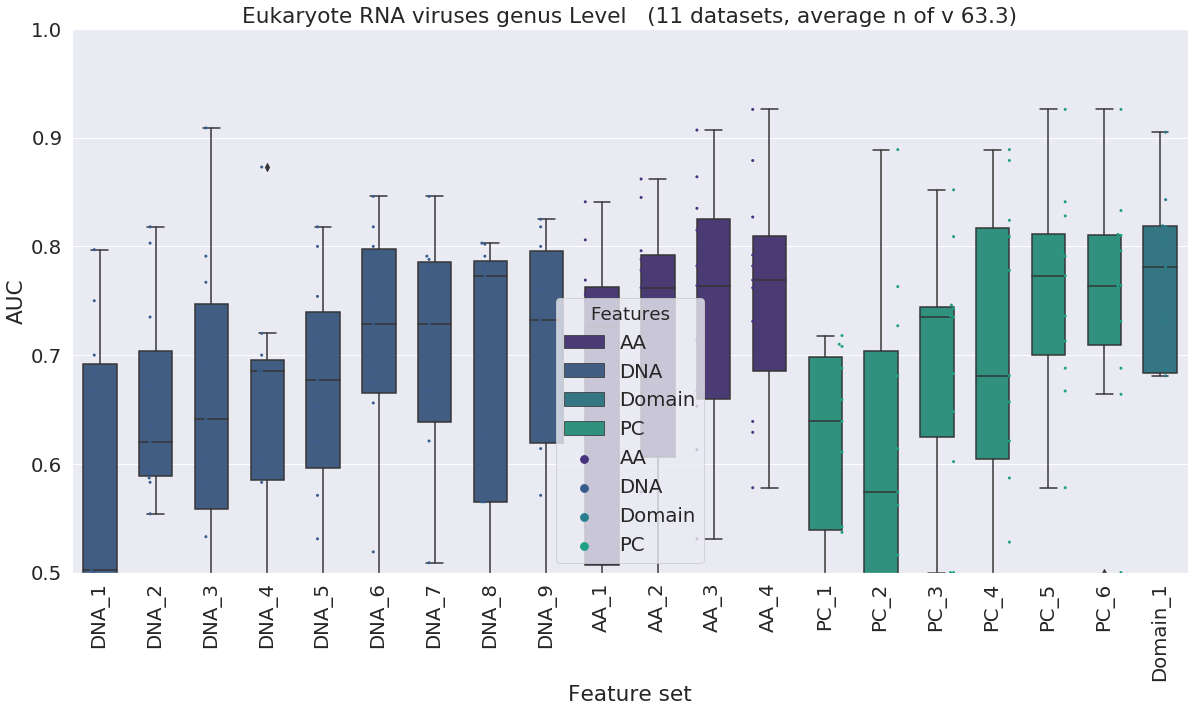

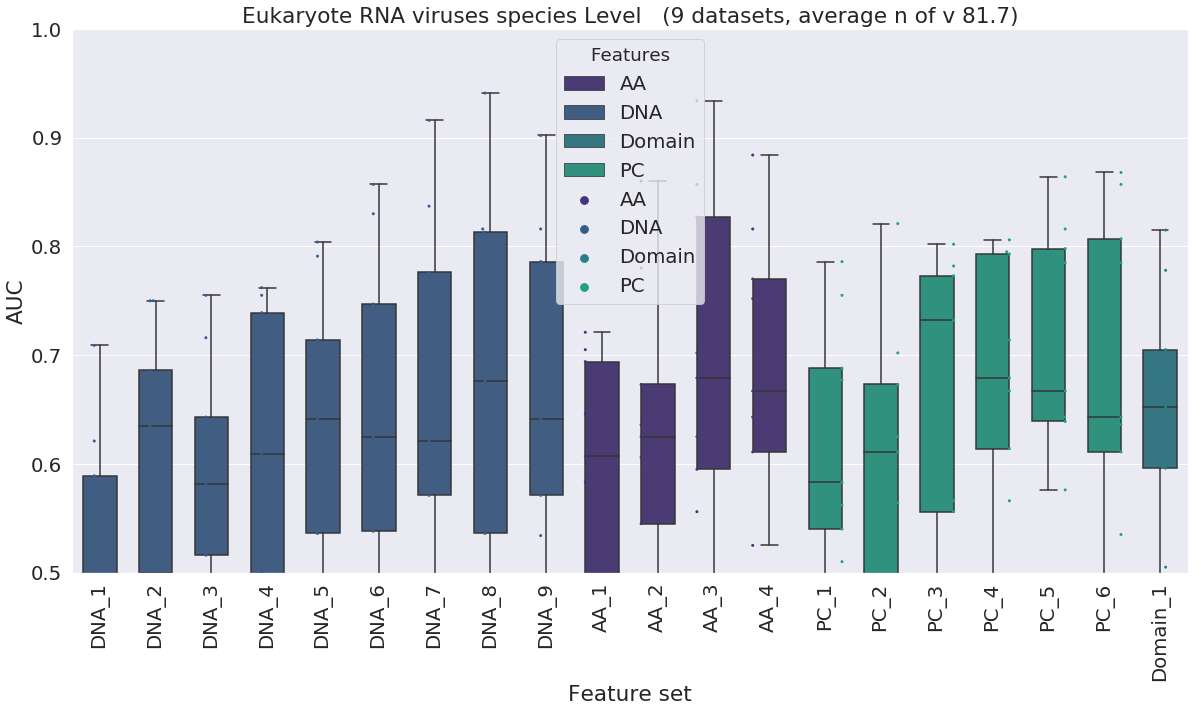

In [359]:

for i, t in enumerate(tax_order):
 
    ss= df[df.tax == t]
    nds =len(set(ss['Dataset']))
    print (t,len(list(set(ss['N in class']))))
    meands =round(s.mean(list(set(ss['N in class']))),1)


    #n =round(s.mean(list(set(ss['N in class']))),1)
    sns.set(font_scale=1.8, palette = 'viridis')
    #grid.map(sns.boxplot, x='Feature set',y= "AUC",hue = "k" ,saturation =1,  width =0.9, data = results)
    f, ax = plt.subplots(figsize=(20, 10))
    plt.xticks(rotation='vertical')
    plt.title(f'Eukaryote RNA viruses {taxranks[i]} Level   ({nds} datasets, average n of v {meands})')
    sns.boxplot( x = 'Feature set', y ='AUC', hue = 'Features',width =0.6,linewidth =1.5,dodge = False, data = ss)

    sp = sns.swarmplot(data = ss,x = 'Feature set',
                     y = 'AUC',hue = 'Features',
                    size = 3, dodge = True)

    sp.set(ylim = (0.5,1.0) ) 
plt.show()
   # f.savefig(f'Figures/{taxlevels[i]}_bxplt_Euk_RNA.png')

/home4/youn01f/Desktop/workspace/myenv/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


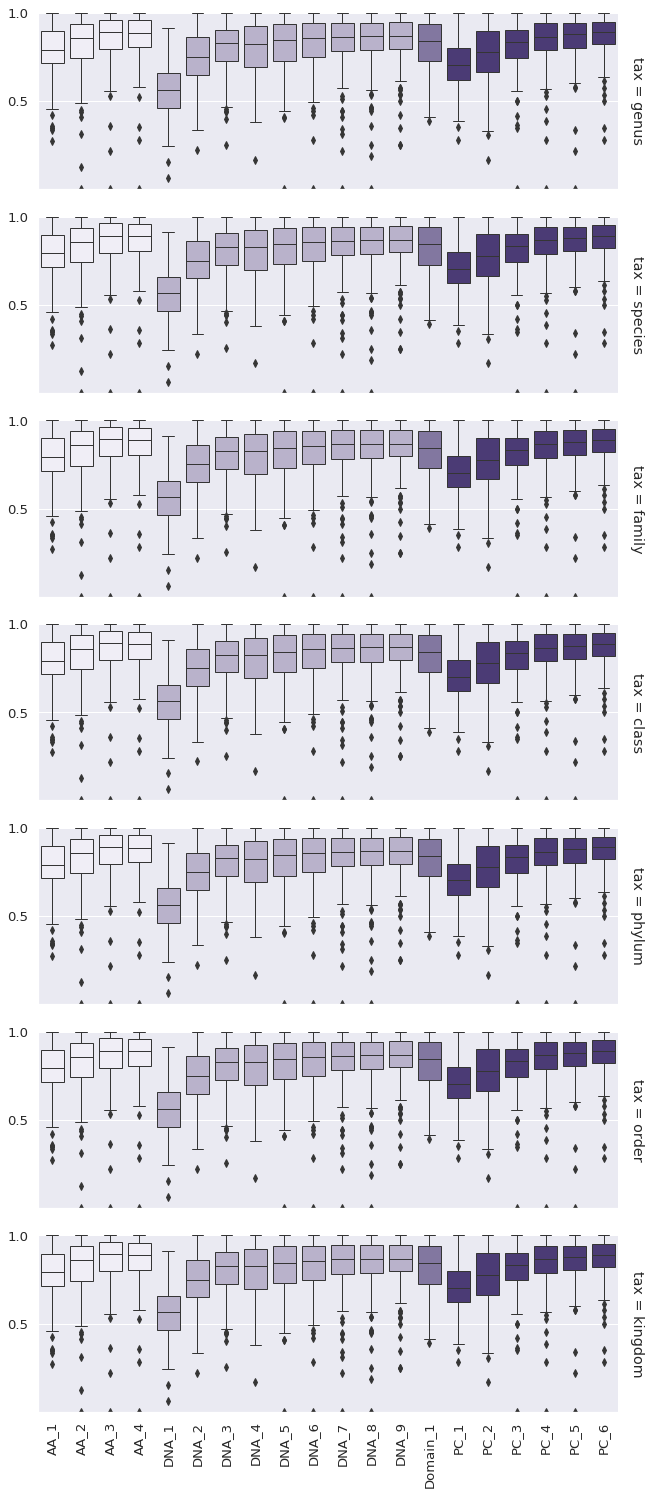

In [293]:
sns.set(font_scale=1.2, palette = 'viridis')
grid = sns.FacetGrid(data= df, row="tax",  margin_titles=True,legend_out = True,
                   aspect =3, palette = 'viridis')


#f, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation='vertical')
grid.map(sns.boxplot, x = 'Feature set', y ='AUC', hue = 'Features',width =0.8,linewidth =1,dodge = False, 
             data = df)
# Draw a line plot to show the trajectory of each random walk
#grid.map(sns.boxplot, x='Feature set',y= "AUC",hue = "k" ,saturation =1,  width =0.9, data = results)

#grid.add_legend();

# Adjust the tick positions and labels
grid.set( yticks=[0.5, 1],

         ylim=(0, 1))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=2)
#grid.savefig('fig1.1.png')

In [315]:
df.head()


Unnamed: 0          Dataset  N in class Features  k    AUC Baltimore  \
0           0  Aedes_genus_RNA          67       AA  1  0.769       RNA   
1           1  Aedes_genus_RNA          67       AA  2  0.639       RNA   
2           2  Aedes_genus_RNA          67       AA  3  0.815       RNA   
3           3  Aedes_genus_RNA          67       AA  4  0.769       RNA   
4           4  Aedes_genus_RNA          67      DNA  1  0.490       RNA   

  Feature set    tax  label  
0        AA_1  genus  Aedes  
1        AA_2  genus  Aedes  
2        AA_3  genus  Aedes  
3        AA_4  genus  Aedes  
4       DNA_1  genus  Aedes

In [316]:
df[df['label'] ==  'Fungi']

Unnamed: 0                 Dataset  N in class Features     k    AUC  \
972          972  Fungi_kingdom_(+)ssRNA          53       AA     1  0.891   
973          973  Fungi_kingdom_(+)ssRNA          53       AA     2  0.936   
974          974  Fungi_kingdom_(+)ssRNA          53       AA     3  0.918   
975          975  Fungi_kingdom_(+)ssRNA          53       AA     4  0.891   
976          976  Fungi_kingdom_(+)ssRNA          53      DNA     1  0.655   
977          977  Fungi_kingdom_(+)ssRNA          53      DNA     2  0.836   
978          978  Fungi_kingdom_(+)ssRNA          53      DNA     3  0.845   
979          979  Fungi_kingdom_(+)ssRNA          53      DNA     4  0.891   
980          980  Fungi_kingdom_(+)ssRNA          53      DNA     5  0.927   
981          981  Fungi_kingdom_(+)ssRNA          53      DNA     6  0.900   
982          982  Fungi_kingdom_(+)ssRNA          53      DNA     7  0.845   
983          983  Fungi_kingdom_(+)ssRNA          53      DNA     8  0.764   
984          984  Fungi_kingdom_(+)ssRNA          53      DNA     9  0.691   
985          985  Fungi_kingdom_(+)ssRNA          53   Domain  None  0.982   
986          986  Fungi_kingdom_(+)ssRNA          53       PC     1  0.945   
987          987  Fungi_kingdom_(+)ssRNA          53       PC     2  0.991   
988          988  Fungi_kingdom_(+)ssRNA          53       PC     3  0.964   
989          989  Fungi_kingdom_(+)ssRNA          53       PC     4  0.964   
990          990  Fungi_kingdom_(+)ssRNA          53       PC     5  0.964   
991          991  Fungi_kingdom_(+)ssRNA          53       PC     6  0.900   
992          992     Fungi_kingdom_dsRNA         143       AA     1  0.832   
993          993     Fungi_kingdom_dsRNA         143       AA     2  0.908   
994          994     Fungi_kingdom_dsRNA         143       AA     3  0.905   
995          995     Fungi_kingdom_dsRNA         143       AA     4  0.890   
996          996     Fungi_kingdom_dsRNA         143      DNA     1  0.589   
997          997     Fungi_kingdom_dsRNA         143      DNA     2  0.737   
998          998     Fungi_kingdom_dsRNA         143      DNA     3  0.807   
999          999     Fungi_kingdom_dsRNA         143      DNA     4  0.865   
1000        1000     Fungi_kingdom_dsRNA         143      DNA     5  0.874   
1001        1001     Fungi_kingdom_dsRNA         143      DNA     6  0.842   
1002        1002     Fungi_kingdom_dsRNA         143      DNA     7  0.830   
1003        1003     Fungi_kingdom_dsRNA         143      DNA     8  0.814   
1004        1004     Fungi_kingdom_dsRNA         143      DNA     9  0.810   
1005        1005     Fungi_kingdom_dsRNA         143   Domain  None  0.730   
1006        1006     Fungi_kingdom_dsRNA         143       PC     1  0.568   
1007        1007     Fungi_kingdom_dsRNA         143       PC     2  0.749   
1008        1008     Fungi_kingdom_dsRNA         143       PC     3  0.784   
1009        1009     Fungi_kingdom_dsRNA         143       PC     4  0.897   
1010        1010     Fungi_kingdom_dsRNA         143       PC     5  0.841   
1011        1011     Fungi_kingdom_dsRNA         143       PC     6  0.879   
1012        1012       Fungi_kingdom_all         236       AA     1  0.953   
1013        1013       Fungi_kingdom_all         236       AA     2  0.953   
1014        1014       Fungi_kingdom_all         236       AA     3  0.970   
1015        1015       Fungi_kingdom_all         236       AA     4  0.878   
1016        1016       Fungi_kingdom_all         236      DNA     1  0.633   
1017        1017       Fungi_kingdom_all         236      DNA     2  0.730   
1018        1018       Fungi_kingdom_all         236      DNA     3  0.845   
1019        1019       Fungi_kingdom_all         236      DNA     4  0.851   
1020        1020       Fungi_kingdom_all         236      DNA     5  0.898   
1021        1021       Fungi_kingdom_all         236      DNA     6  0.942   
1022        1022       Fungi

### Sort the dataset order

In [382]:
#df.sort_values(['col1', 'col2'], ascending=False)
df.sort_values(['tax','label','Baltimore'],inplace=True)
unique =[]
[unique.append(ds) for ds in(list(df['Dataset']))if ds not in unique ]
for u in unique:
    print(u, df[df['Dataset']==u].iloc[0]['N in class'])  #df[df.A > 3].iloc[0]

Fungi_kingdom_all_236 236
Fungi_kingdom_(+)ssRNA_53 53
Fungi_kingdom_dsRNA_143 143
Metazoa_kingdom_all_3315 3315
Metazoa_kingdom_(+)ssRNA_1551 1551
Metazoa_kingdom_(-)ssRNA_141 141
Metazoa_kingdom_dsRNA_173 173
Metazoa_kingdom_dsDNA_57 57
Metazoa_kingdom_ssDNA_512 512
Metazoa_kingdom_Retro_95 95
Viridiplantae_kingdom_all_2998 2998
Viridiplantae_kingdom_(+)ssRNA_1484 1484
Viridiplantae_kingdom_(-)ssRNA_135 135
Viridiplantae_kingdom_dsRNA_81 81
Viridiplantae_kingdom_ssDNA_523 523
Arthropoda_phylum_all_1584 1584
Arthropoda_phylum_RNA_635 635
Arthropoda_phylum_(+)ssRNA_302 302
Arthropoda_phylum_dsRNA_55 55
Arthropoda_phylum_dsDNA_170 170
Arthropoda_phylum_ssDNA_113 113
Chordata_phylum_all_3600 3600
Chordata_phylum_RNA_655 655
Chordata_phylum_(+)ssRNA_1379 1379
Chordata_phylum_(-)ssRNA_334 334
Chordata_phylum_dsRNA_116 116
Chordata_phylum_dsDNA_233 233
Chordata_phylum_ssDNA_349 349
Chordata_phylum_Retro_95 95
Streptophyta_phylum_(+)ssRNA_1484 1484
Streptophyta_phylum_(-)ssRNA_135 135
Strept

In [343]:
#len(set(df['label']))
#df2 =df.groupby('label').first
df.groupby(['tax','Baltimore'])['label'].nunique()

tax      Baltimore
class    (+)ssRNA      3
         (-)ssRNA      3
         RNA           4
         Retro         1
         all           3
         dsDNA         2
         dsRNA         2
         ssDNA         2
family   RNA          14
genus    RNA          11
kingdom  (+)ssRNA      3
         (-)ssRNA      2
         Retro         1
         all           3
         dsDNA         1
         dsRNA         3
         ssDNA         2
order    (+)ssRNA      4
         (-)ssRNA      4
         RNA          11
         Retro         1
         all           2
         dsDNA         4
         dsRNA         2
         ssDNA         4
phylum   (+)ssRNA      3
         (-)ssRNA      2
         RNA           2
         Retro         1
         all           2
         dsDNA         2
         dsRNA         3
         ssDNA         3
species  RNA           9
Name: label, dtype: int64

In [323]:
df1.head()

Unnamed: 0          Dataset  N in class Features  k    AUC Baltimore  \
0            0  Aedes_genus_RNA          67       AA  1  0.769       RNA   
18          18  Aedes_genus_RNA          67       PC  5  0.773       RNA   
17          17  Aedes_genus_RNA          67       PC  4  0.778       RNA   
16          16  Aedes_genus_RNA          67       PC  3  0.648       RNA   
15          15  Aedes_genus_RNA          67       PC  2  0.431       RNA   

   Feature set    tax  label  
0         AA_1  genus  Aedes  
18        PC_5  genus  Aedes  
17        PC_4  genus  Aedes  
16        PC_3  genus  Aedes  
15        PC_2  genus  Aedes

In [383]:
#table = pivot_table(df, values='D', index=['A', 'B'],
#               columns=['C'], aggfunc=np.sum)

#df2 = df.pivot_table(index =['Dataset'],columns = ['Feature set'], values = 'AUC', aggfunc=np.mean)
#df2 = df.pivot('Dataset','Feature set', 'AUC')
df3= df2.reindex(unique)
df2.shape


(119, 20)

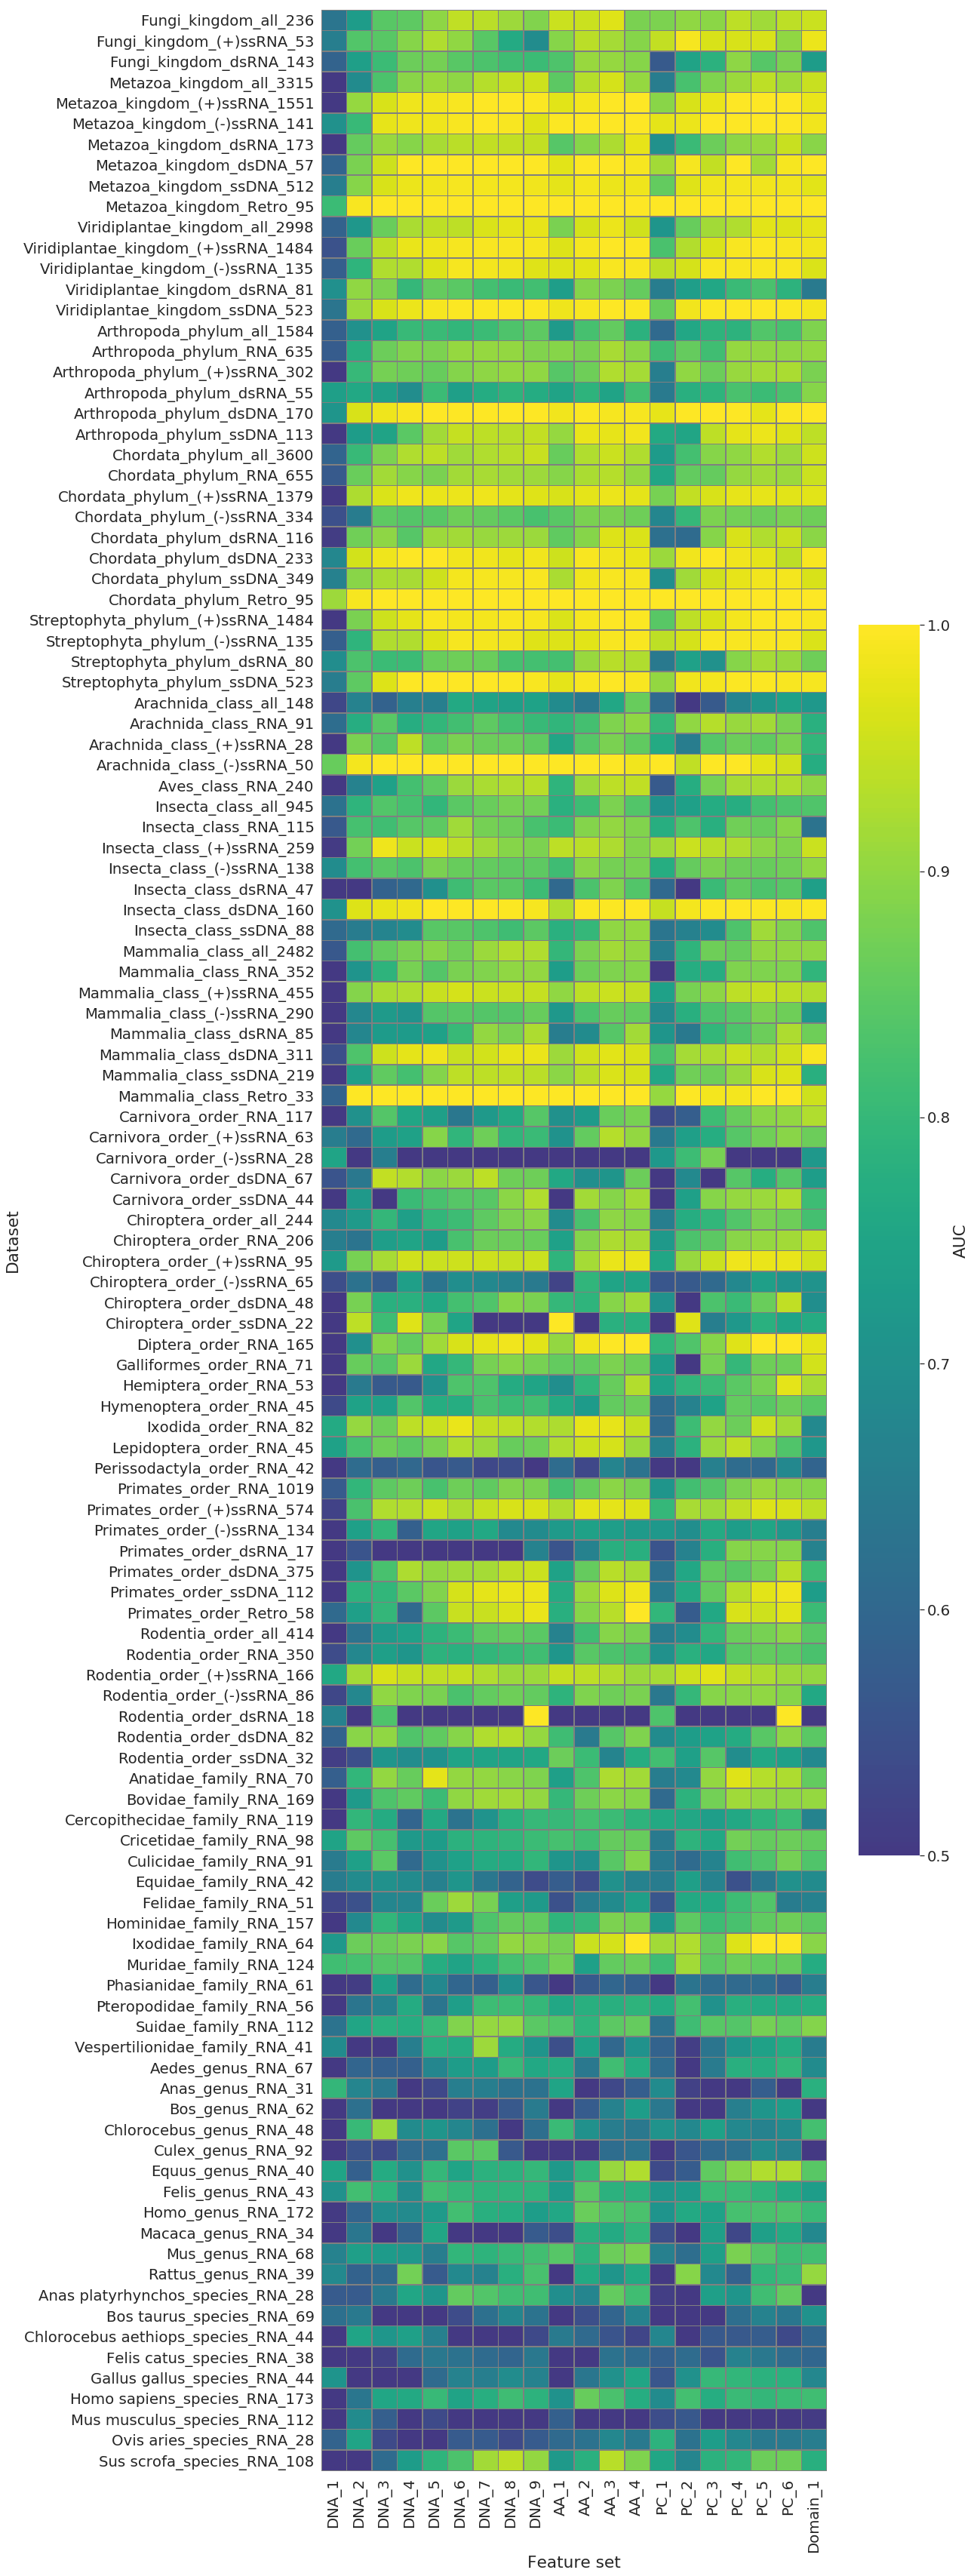

In [389]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 60))
sns.heatmap(df3,cmap = 'viridis',center =0.7, vmin = 0.5, 
cbar_kws={"shrink": 0.5, 'label':'AUC'},linewidths=0.5,linecolor="grey")

f.savefig('Figures/heatmap_Euk_all.png', bbox_inches="tight")

In [353]:
df2.describe()

Feature set        AA_1        AA_2        AA_3        AA_4       DNA_1  \
count        119.000000  119.000000  119.000000  119.000000  119.000000   
mean           0.774584    0.815034    0.853471    0.855601    0.552218   
std            0.165787    0.177240    0.158321    0.151561    0.147074   
min            0.273000    0.000000    0.000000    0.000000    0.062000   
25%            0.709500    0.753000    0.812500    0.804000    0.462000   
50%            0.792000    0.858000    0.890000    0.888000    0.565000   
75%            0.897500    0.937500    0.962500    0.957500    0.656000   
max            1.000000    1.000000    1.000000    1.000000    0.912000   

Feature set       DNA_2       DNA_3       DNA_4       DNA_5       DNA_6  \
count        119.000000  119.000000  119.000000  119.000000  119.000000   
mean           0.741508    0.789332    0.789408    0.810496    0.824286   
std            0.145135    0.152054    0.163846    0.160429    0.162857   
min            0.222000    0.253000    0.167000    0.000000    0.000000   
25%            0.649500    0.724500    0.692500    0.729000    0.750000   
50%            0.745000    0.825000    0.829000    0.844000    0.847000   
75%            0.855000    0.900500    0.923500    0.923500    0.940500   
max            1.000000    1.000000    1.000000    1.000000    1.000000   

Feature set       DNA_7       DNA_8       DNA_9    Domain_1        PC_1  \
count        119.000000  119.000000  119.000000  119.000000  119.000000   
mean           0.827534    0.823693    0.832718    0.821979    0.704416   
std            0.174840    0.178150    0.155263    0.136922    0.147179   
min            0.000000    0.000000    0.250000    0.389000    0.281000   
25%            0.784000    0.779500    0.792500    0.724500    0.621500   
50%            0.863000    0.865000    0.862000    0.843000    0.702000   
75%            0.939500    0.942500    0.947000    0.940000    0.798000   
max            1.000000    1.000000    1.000000    1.000000    1.000000   

Feature set        PC_2        PC_3        PC_4        PC_5        PC_6  
count        119.000000  119.000000  119.000000  119.000000  119.000000  
mean           0.756849    0.807563    0.836861    0.851630    0.862786  
std            0.177238    0.155932    0.157866    0.150525    0.130246  
min            0.167000    0.000000    0.000000    0.000000    0.281000  
25%            0.665500    0.745500    0.794000    0.812000    0.818500  
50%            0.778000    0.839000    0.866000    0.878000    0.890000  
75%            0.899500    0.902000    0.942500    0.943000    0.952500  
max            1.000000    1.000000    1.000000    1.000000    1.000000

In [ ]:
# label_order = ['Metazoa','Chordata','Mammalia','Primates']
# balt_order = ['dsDNA','ssDNA', '(-)ssRNA' , '(+)ssRNA','dsRNA', 'Retro']
# df['label'] = df['label'].astype("category")
# df['label'].cat.set_categories(label_order, inplace=True)
# df['baltimore'] = df['baltimore'].astype("category")
# df['baltimore'].cat.set_categories(balt_order, inplace=True)

# dfA = df.sort_values(["label","baltimore","X"])

In [237]:
ss =df[ df['positive label'].isin (['Arthropoda','Chordata'])]

In [208]:
ss

positive label label tax group  pool label pool tax group Baltimore  \
100   Vespertilionidae          family  Chiroptera          order       all   
101   Vespertilionidae          family  Chiroptera          order       all   
102   Vespertilionidae          family  Chiroptera          order       all   
103   Vespertilionidae          family  Chiroptera          order       all   
104   Vespertilionidae          family  Chiroptera          order       all   
105   Vespertilionidae          family  Chiroptera          order       all   
106   Vespertilionidae          family  Chiroptera          order       all   
107   Vespertilionidae          family  Chiroptera          order       all   
108   Vespertilionidae          family  Chiroptera          order       all   
109   Vespertilionidae          family  Chiroptera          order       all   
110   Vespertilionidae          family  Chiroptera          order       all   
111   Vespertilionidae          family  Chiroptera          order       all   
112   Vespertilionidae          family  Chiroptera          order       all   
113   Vespertilionidae          family  Chiroptera          order       all   
114   Vespertilionidae          family  Chiroptera          order       all   
115   Vespertilionidae          family  Chiroptera          order       all   
116   Vespertilionidae          family  Chiroptera          order       all   
117   Vespertilionidae          family  Chiroptera          order       all   
118   Vespertilionidae          family  Chiroptera          order       all   
119   Vespertilionidae          family  Chiroptera          order       all   
180       Pteropodidae          family  Chiroptera          order       all   
181       Pteropodidae          family  Chiroptera          order       all   
182       Pteropodidae          family  Chiroptera          order       all   
183       Pteropodidae          family  Chiroptera          order       all   
184       Pteropodidae          family  Chiroptera          order       all   
185       Pteropodidae          family  Chiroptera          order       all   
186       Pteropodidae          family  Chiroptera          order       all   
187       Pteropodidae          family  Chiroptera          order       all   
188       Pteropodidae          family  Chiroptera          order       all   
189       Pteropodidae          family  Chiroptera          order       all   
...                ...             ...         ...            ...       ...   
1147           Diptera           order     Insecta          class       all   
1148           Diptera           order     Insecta          class       all   
1149           Diptera           order     Insecta          class       all   
1150           Diptera           order     Insecta          class       all   
1151           Diptera           order     Insecta          class       all   
1152           Diptera           order     Insecta          class       all   
1153           Diptera           order     Insecta          class       all   
1154           Diptera           order     Insecta          class       all   
1155           Diptera           order     Insecta          class       all   
1156           Diptera           order     Insecta          class       all   
1257           Insecta           class  Arthropoda         phylum       all   
1258           Insecta           class  Arthropoda         phylum       all   
1259           Insecta           class  Arthropoda         phylum       all   
1260           Insecta           class  Arthropoda         phylum       all   
1261           Insecta           class  Arthropoda         phylum       all   
1262           Insecta           class  Arthropoda         phylum       all   
1263           Insecta           class  Arthropoda         phylum       all   
1264           Insecta           class  Arthropoda         phylum       all   
1265           Insecta           class  Arthropoda        

In [240]:
ss =df[ df['positive label'].isin (danslists)] 

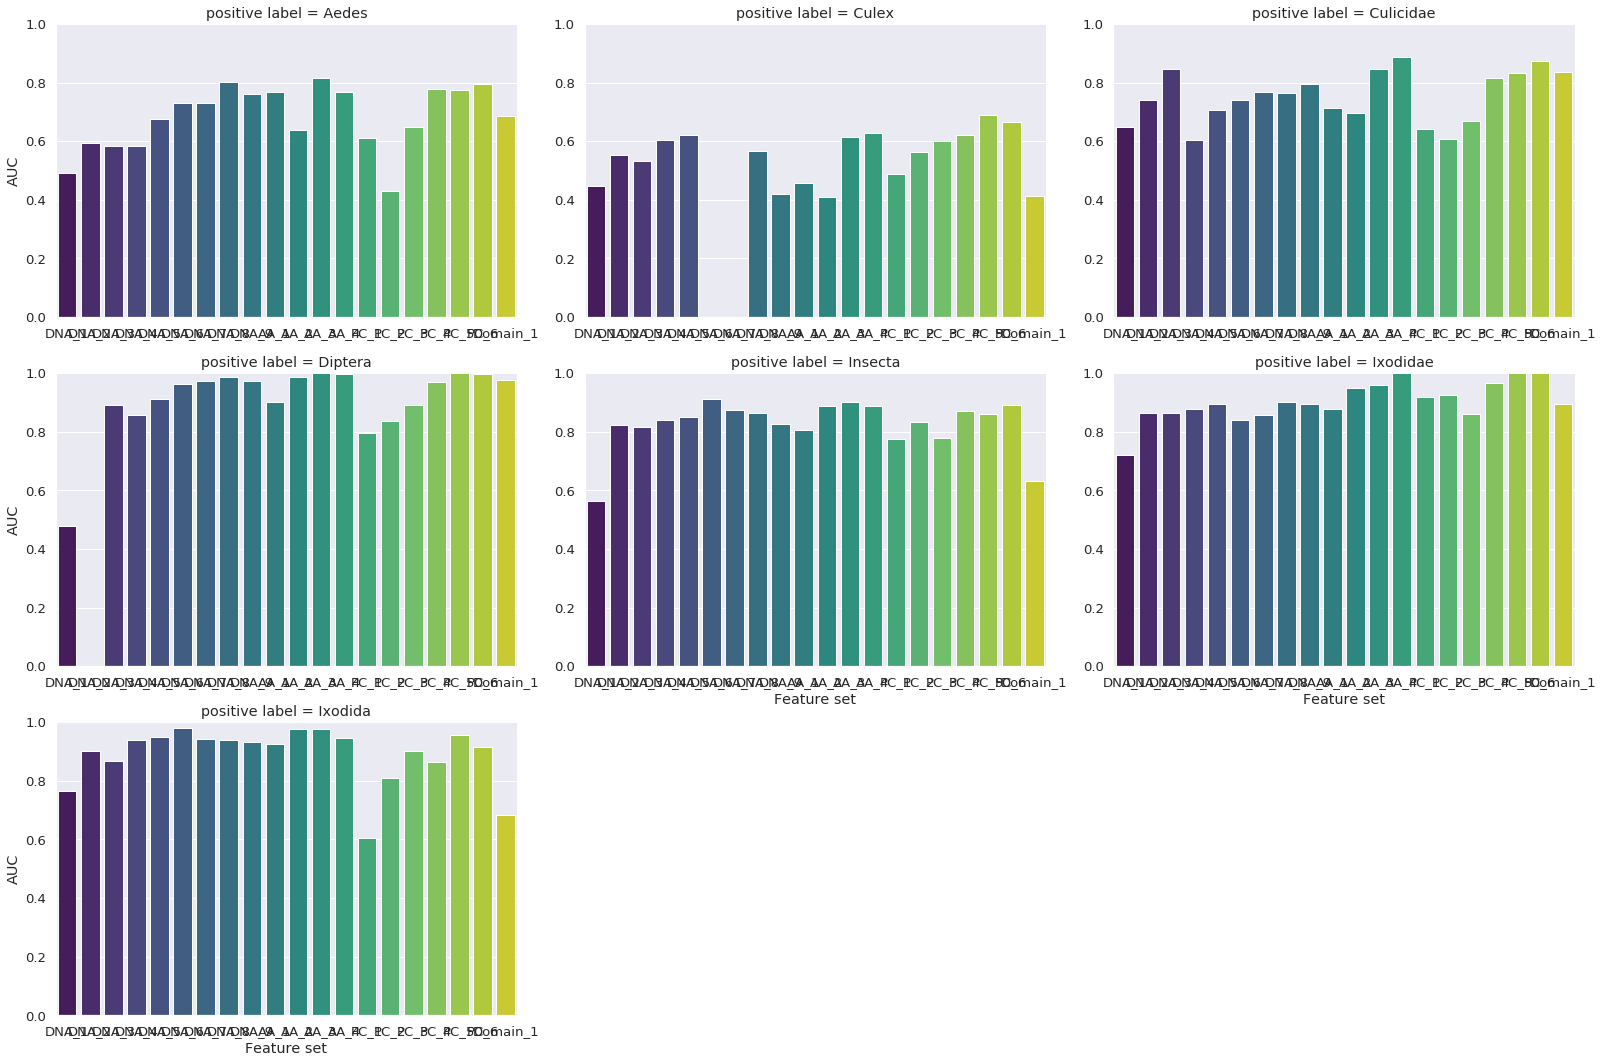

In [241]:
sns.set(font_scale=1.2)

ss.melt ('positive label','AUC','Feature set')
g =sns.FacetGrid(ss,col ='positive label',sharey = False,sharex=False, height=5, aspect=1.5, col_wrap =3)
g.map(sns.barplot,'Feature set','AUC',palette ='viridis',order = fs_order,)
# ax1,ax2 = g.axes[0]
# ax1.axhline(0.81, xmin=0., xmax=1,linewidth=3, color='r')
# ax2.axhline(0.66, xmin=0, xmax=1,linewidth=4, color='r')
#[plt.setp (ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.set(ylim = (0,1) )

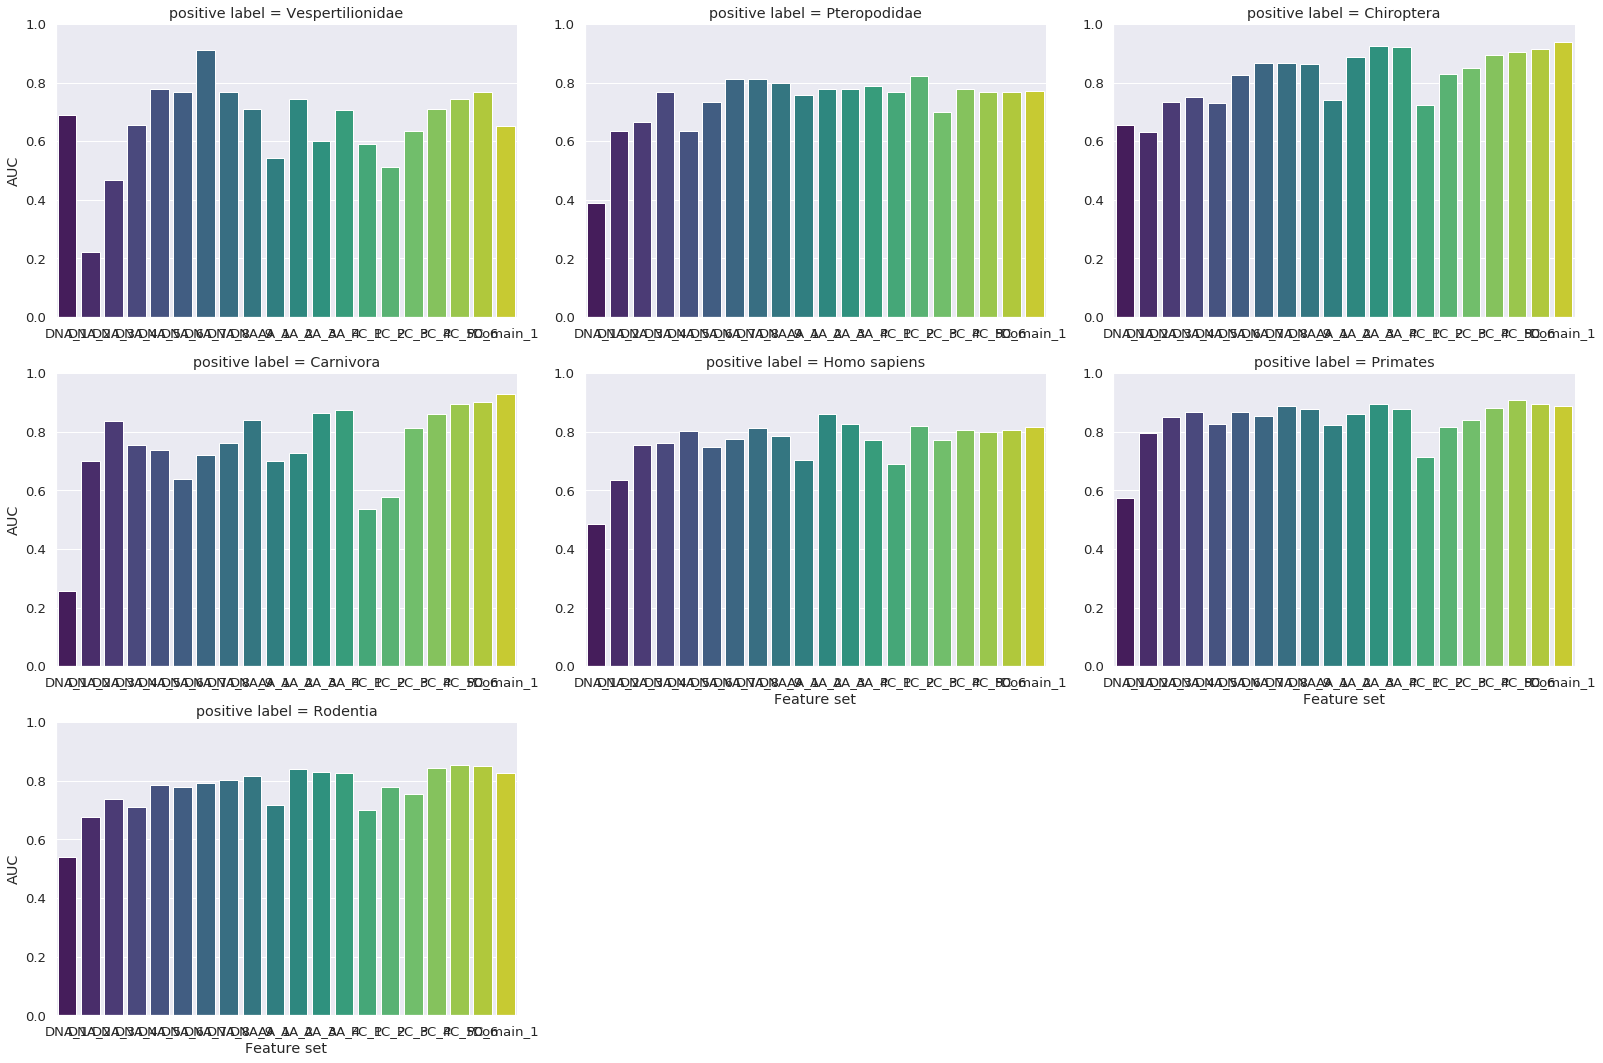

In [244]:
ss =df[ df['positive label'].isin (danslist2)] 


sns.set(font_scale=1.2)

ss.melt ('positive label','AUC','Feature set')
g =sns.FacetGrid(ss,col ='positive label',sharey = False,sharex=False, height=5, aspect=1.5, col_wrap =3)
g.map(sns.barplot,'Feature set','AUC',palette ='viridis',order = fs_order,)
# ax1,ax2 = g.axes[0]
# ax1.axhline(0.81, xmin=0., xmax=1,linewidth=3, color='r')
# ax2.axhline(0.66, xmin=0, xmax=1,linewidth=4, color='r')
#[plt.setp (ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.set(ylim = (0,1) )

In [198]:
set(df['positive label'])

{'Aedes',
 'Anas',
 'Anatidae',
 'Arachnida',
 'Arthropoda',
 'Aves',
 'Bivalvia',
 'Bos',
 'Bos taurus',
 'Canidae',
 'Canis lupus',
 'Carnivora',
 'Cercopithecidae',
 'Chiroptera',
 'Chlorocebus',
 'Chlorocebus aethiops',
 'Chordata',
 'Cricetidae',
 'Culex',
 'Culicidae',
 'Decapoda',
 'Diptera',
 'Equidae',
 'Equus',
 'Equus caballus',
 'Eulipotyphla',
 'Felidae',
 'Felis',
 'Felis catus',
 'Galliformes',
 'Gallus gallus',
 'Hemiptera',
 'Hominidae',
 'Homo',
 'Homo sapiens',
 'Hymenoptera',
 'Insecta',
 'Ixodida',
 'Ixodidae',
 'Lepidoptera',
 'Libellulidae',
 'Macaca',
 'Macaca mulatta',
 'Mammalia',
 'Meleagris gallopavo',
 'Mollusca',
 'Muridae',
 'Mus',
 'Mus musculus',
 'Noctuidae',
 'Odonata',
 'Ovis aries',
 'Pan',
 'Pan troglodytes',
 'Passeriformes',
 'Perissodactyla',
 'Phasianidae',
 'Phyllostomidae',
 'Primates',
 'Pteropodidae',
 'Pteropus',
 'Rattus',
 'Rattus norvegicus',
 'Rhinolophus',
 'Rodentia',
 'Suidae',
 'Sus scrofa',
 'Veneroida',
 'Vespertilionidae'}

In [243]:
danslists =['Culex', 'Culicidae','Aedes','Diptera','Insecta', 'Ixodida','Ixodidae']
#
danslist2 =['Rodentia','Carnivora','Homo sapiens','Primates','Chiroptera','Pteropodidae','Phyllostomidae','Vespertilionidae']

In [254]:
ss =df[ df['label tax group']== 'genus'and df['positive label'].isin (danslists)] 


sns.set(font_scale=1.2)

ss.melt ('positive label','AUC','Feature set')
g =sns.FacetGrid(ss,col ='positive label',sharey = False,sharex=False, height=5, aspect=1.5, col_wrap =4)
g.map(sns.barplot,'Feature set','AUC',palette ='viridis',order = fs_order,)
# ax1,ax2 = g.axes[0]
# ax1.axhline(0.81, xmin=0., xmax=1,linewidth=3, color='r')
# ax2.axhline(0.66, xmin=0, xmax=1,linewidth=4, color='r')
[plt.setp (ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.set(ylim = (0,1) )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().